In [2]:
!pip install gensim

In [0]:
import pandas as pd
import numpy as np
from gensim import corpora


train = pd.read_csv('train.csv', header=None)
test = pd.read_csv('test.csv', header=None)

train_data = train[list(range(50))].as_matrix()
test_data = test[list(range(50))].as_matrix()
train_labels = train[50].as_matrix()
test_labels = test[50].as_matrix()


In [4]:
dictionary = corpora.Dictionary.load_from_text('bungo_dict.txt').token2id
WORD_SIZE = len(dictionary) + 2 # 未知語、空文字列にIDをふるために2を足す
print('語彙: ', WORD_SIZE)

語彙:  112227


In [0]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding
from keras.layers import LSTM

In [6]:
model = Sequential()
model.add(Embedding(WORD_SIZE, 512, input_length=50))
model.add(LSTM(32))
model.add(Dense(9, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 512)           57460224  
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                69760     
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 297       
Total params: 57,530,281
Trainable params: 57,530,281
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

x_train = train_data
x_test = test_data

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = one_hot_train_labels[:10000]
partial_y_train = one_hot_train_labels[10000:]

In [9]:
history = model.fit(partial_x_train, partial_y_train, epochs=10, batch_size=512, validation_data=(x_val, y_val))

Train on 80000 samples, validate on 10000 samples
Epoch 1/10
80000/80000 [==============================] - 29s 363us/step - loss: 1.4188 - acc: 0.5492 - val_loss: 1.0994 - val_acc: 0.6506
Epoch 2/10
80000/80000 [==============================] - 27s 338us/step - loss: 0.6667 - acc: 0.8005 - val_loss: 0.6681 - val_acc: 0.7886
Epoch 3/10
80000/80000 [==============================] - 27s 338us/step - loss: 0.3532 - acc: 0.8946 - val_loss: 0.4756 - val_acc: 0.8596
Epoch 4/10
80000/80000 [==============================] - 27s 336us/step - loss: 0.1969 - acc: 0.9450 - val_loss: 0.4956 - val_acc: 0.8554
Epoch 5/10
80000/80000 [==============================] - 27s 338us/step - loss: 0.1152 - acc: 0.9677 - val_loss: 0.5145 - val_acc: 0.8469
Epoch 6/10
80000/80000 [==============================] - 27s 336us/step - loss: 0.0727 - acc: 0.9797 - val_loss: 0.4724 - val_acc: 0.8634
Epoch 7/10
80000/80000 [==============================] - 27s 335us/step - loss: 0.0485 - acc: 0.9873 - val_loss: 0.

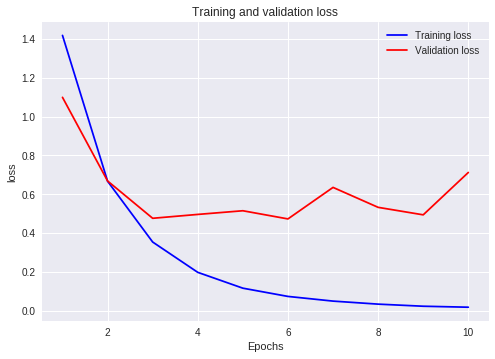

In [10]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

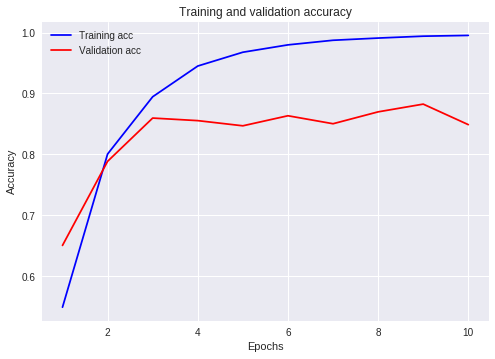

In [11]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
model.save('pre_trained_model.h5')

In [13]:
results = model.evaluate(x_test, one_hot_test_labels)

10000/10000 [==============================] - 10s 955us/step


In [14]:
results

[0.47970919374823573, 0.8965]

In [0]:
#predictions = model.predict(x_test)

In [0]:
#predictions

## 学習した重みをGoogle Driveにアップロード

In [0]:
import google.colab
import googleapiclient.discovery
import googleapiclient.http

In [0]:
google.colab.auth.authenticate_user()
drive_service = googleapiclient.discovery.build('drive', 'v3')

In [0]:
saving_filename = "pre_trained_model.h5"

file_metadata = {
  'name': saving_filename,
  'mimeType': 'application/octet-stream'
}
media = googleapiclient.http.MediaFileUpload(saving_filename, 
                        mimetype='application/octet-stream',
                        resumable=True)
created = drive_service.files().create(body=file_metadata,
                                       media_body=media,
                                       fields='id').execute()